# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [11]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
df = pd.read_csv('cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [2]:
df.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,38531.000000,38531.000000,38521.000000,38531.000000,38531.000000,38531.000000,38531.000000
mean,248864.638447,2002.943734,2.055161,6639.971021,9.649062,16.306091,80.577249
std,136072.376530,8.065731,0.671178,6428.152018,6.093217,43.286933,112.826569
min,0.000000,1942.000000,0.200000,1.000000,1.000000,1.000000,0.000000
25%,158000.000000,1998.000000,1.600000,2100.000000,5.000000,2.000000,23.000000
50%,250000.000000,2003.000000,2.000000,4800.000000,8.000000,5.000000,59.000000
75%,325000.000000,2009.000000,2.300000,8990.000000,12.000000,16.000000,91.000000
max,1000000.000000,2019.000000,8.000000,50000.000000,86.000000,1861.000000,2232.000000


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [6]:
df['price_usd'].mean()

np.float64(6639.971021255613)

In [7]:
df['price_usd'].median()

np.float64(4800.0)

In [5]:
df["price_usd"].max()

np.float64(50000.0)

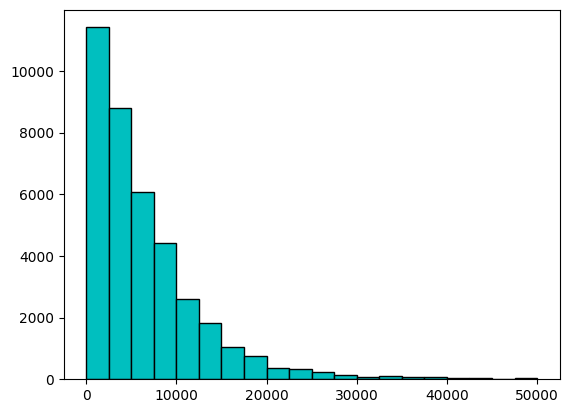

In [10]:
# df['price_usd'].plot.hist(bins=20)
plt.hist(df['price_usd'], bins=20, color='c', edgecolor='black')
plt.show()

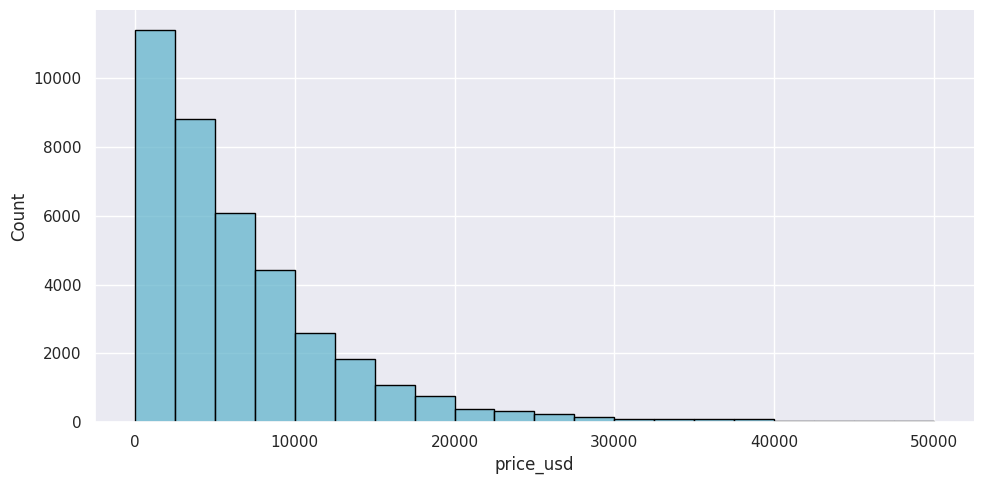

In [128]:
sns.displot(data=df, x='price_usd', bins=20, color='c', edgecolor='black', height=5, aspect=2)
plt.show()

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

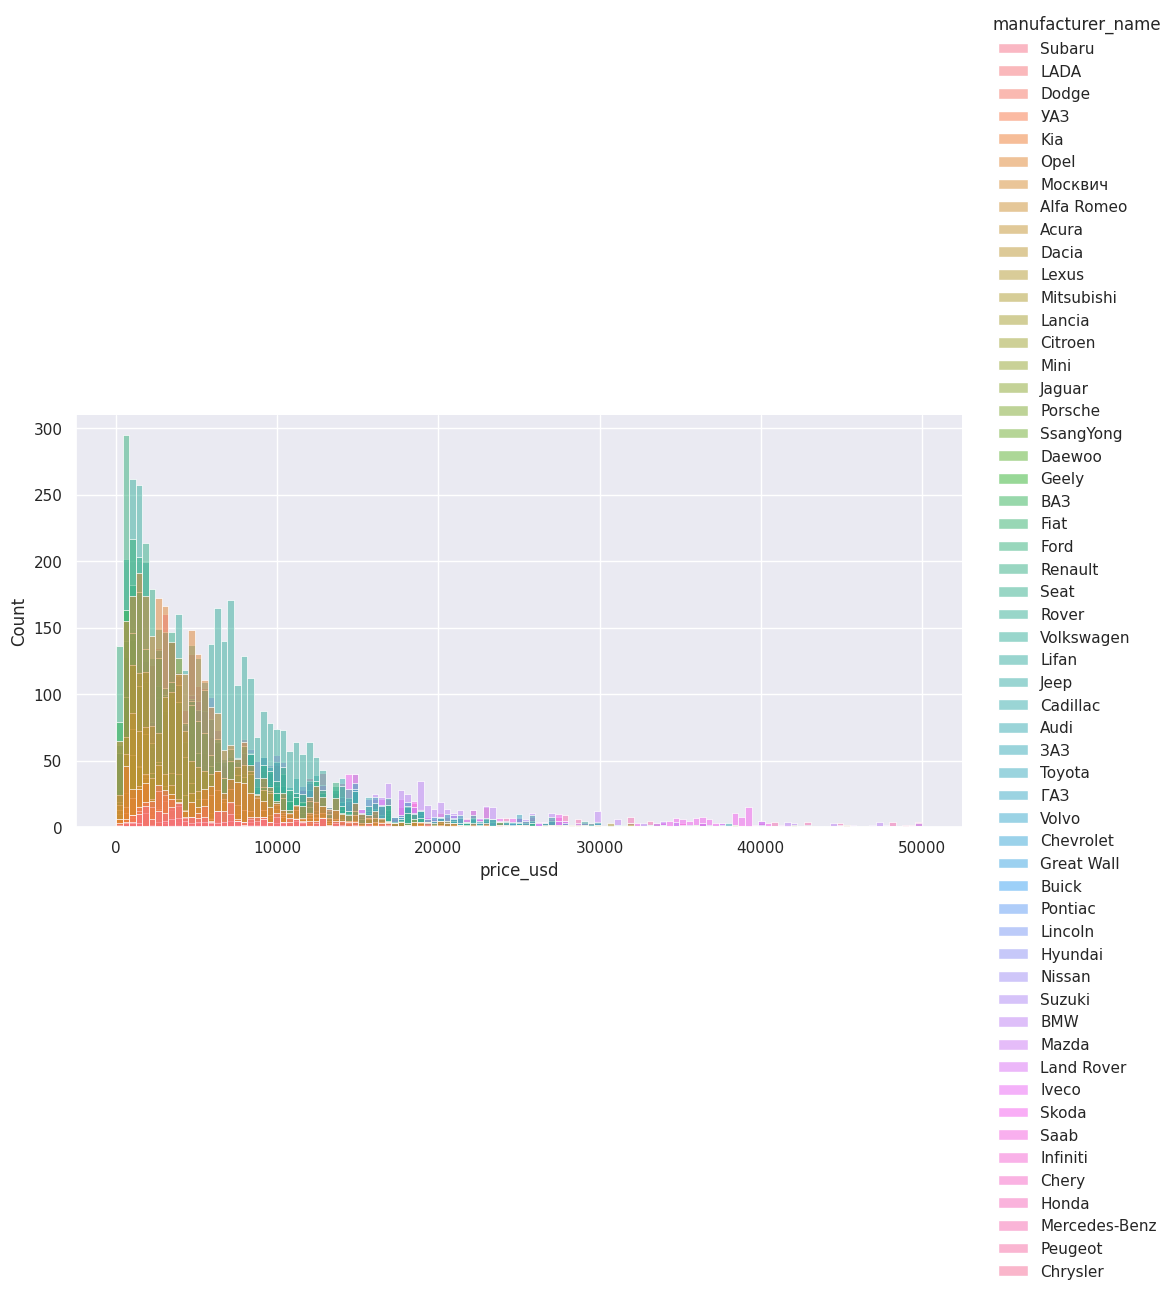

In [127]:

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name', height=5, aspect=2)
plt.show()

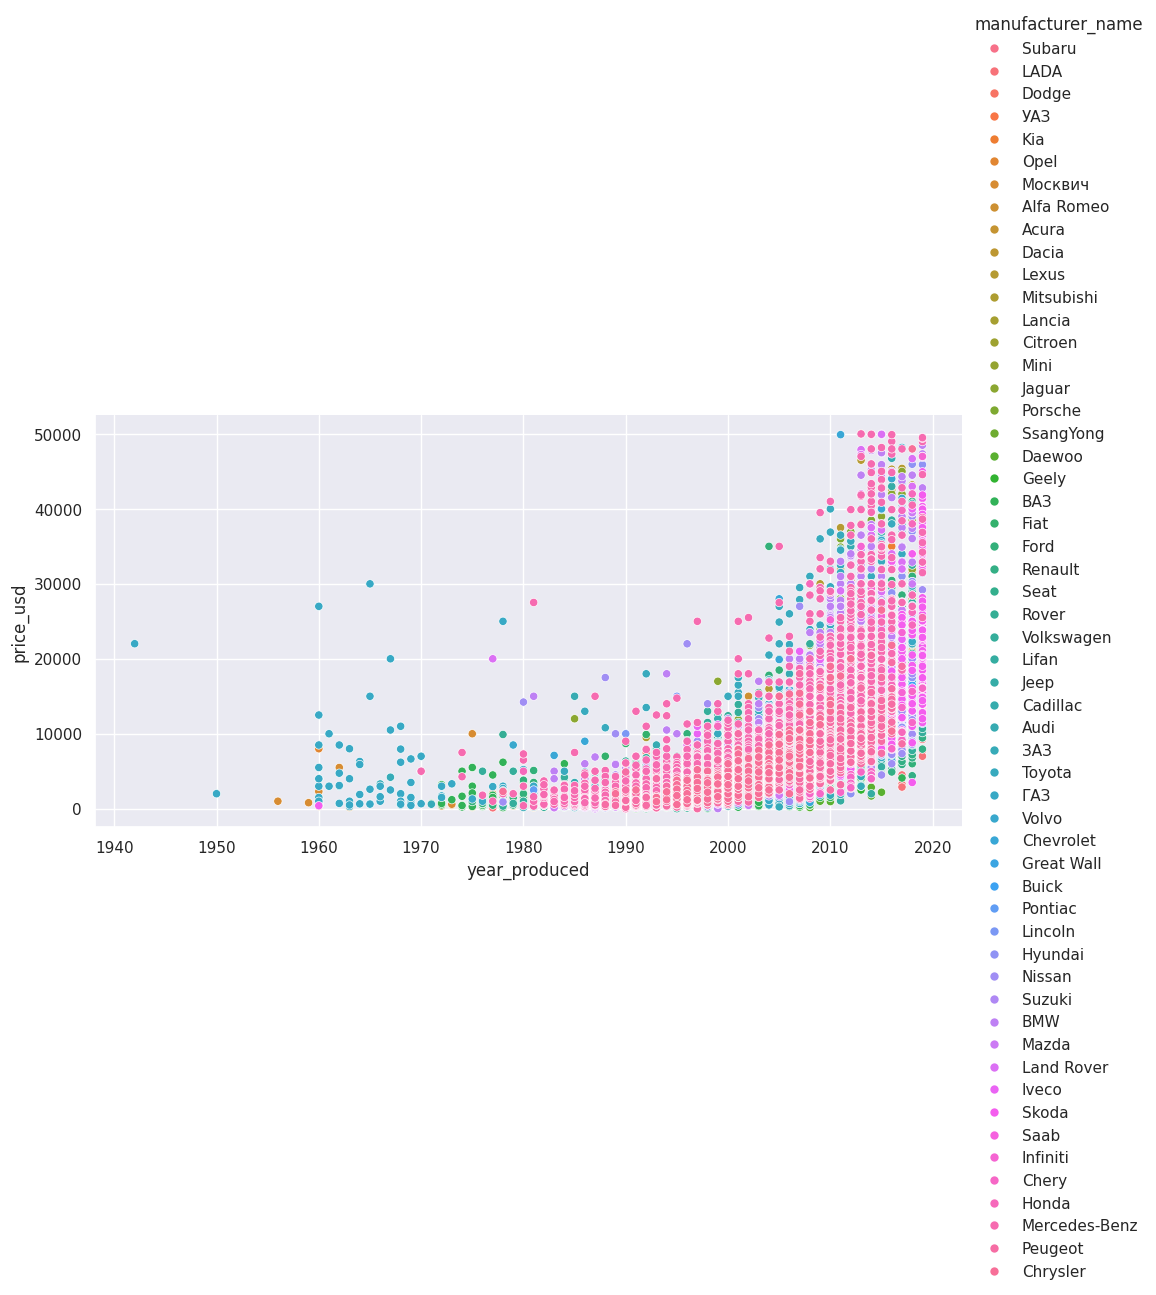

In [126]:
sns.relplot(data=df, x='year_produced', y='price_usd', hue='manufacturer_name', height=5, aspect=2)
plt.show()

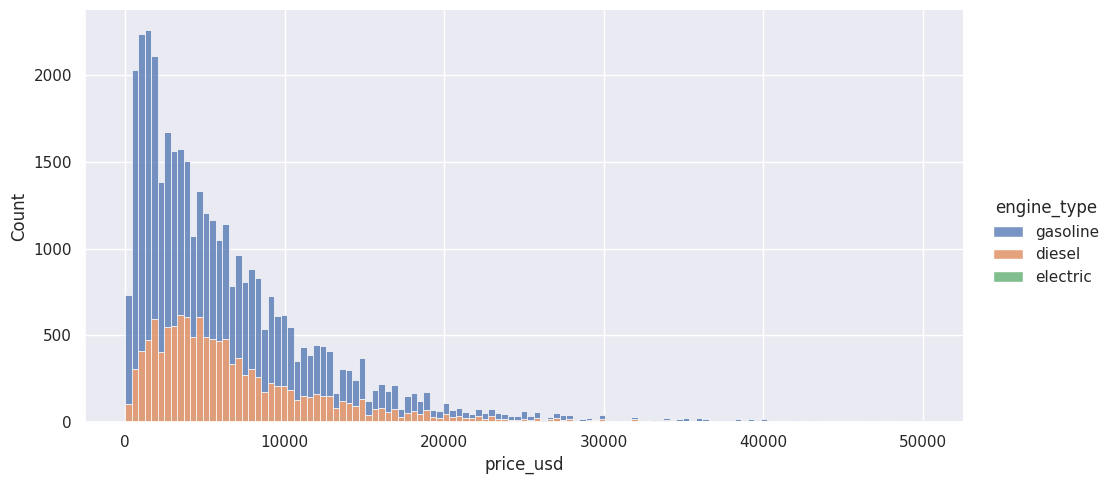

In [123]:
sns.displot(df, x="price_usd", hue="engine_type", multiple="stack", height=5, aspect=2)
plt.show()

In [22]:
df.groupby("engine_type").size()

engine_type
diesel      12874
electric       10
gasoline    25647
dtype: int64

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

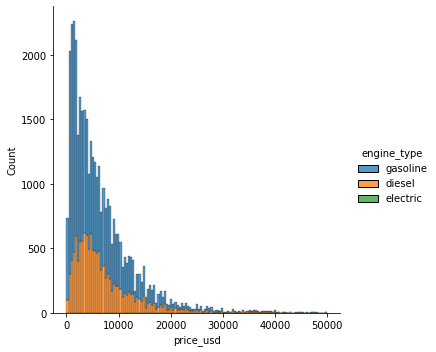

In [7]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [8]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



In [33]:
q7 = df[df["model_name"] == "Q7"]
q7

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
19515,Audi,Q7,automatic,grey,275000,2007,diesel,False,diesel,3.0,...,False,False,False,False,False,False,False,False,False,21
19547,Audi,Q7,automatic,white,105000,2014,diesel,False,diesel,3.0,...,True,True,True,True,True,True,True,True,True,216
19559,Audi,Q7,automatic,other,170000,2006,diesel,False,diesel,3.0,...,True,True,True,True,True,False,True,False,True,24
19574,Audi,Q7,automatic,black,185000,2016,diesel,False,diesel,3.0,...,False,False,True,True,True,True,True,True,True,7
19583,Audi,Q7,automatic,other,210000,2010,diesel,False,diesel,4.2,...,True,True,True,False,True,True,True,True,True,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21756,Audi,Q7,automatic,silver,200000,2008,gasoline,False,gasoline,3.6,...,True,True,True,True,True,True,True,True,True,91
21812,Audi,Q7,automatic,black,276000,2008,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,115
21873,Audi,Q7,automatic,black,273000,2006,gasoline,False,gasoline,4.2,...,True,True,False,True,True,True,True,False,True,147
21900,Audi,Q7,automatic,white,283000,2007,diesel,False,diesel,4.2,...,True,True,True,True,True,True,True,True,True,159


In [34]:
q7.describe()

,odometer_value,year_produced,engine_capacity,price_usd,number_of_photos,up_counter,duration_listed
count,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000,79.000000
mean,201711.924051,2009.050633,3.493671,19652.406962,13.278481,24.329114,93.797468
std,53591.620690,2.759128,0.613385,9677.121753,8.424532,66.093120,112.676116
min,86291.000000,2006.000000,3.000000,8990.000000,1.000000,1.000000,0.000000
25%,169072.500000,2007.000000,3.000000,13200.000000,8.000000,2.000000,31.000000
50%,200000.000000,2008.000000,3.000000,15700.000000,11.000000,7.000000,63.000000
75%,234300.000000,2010.000000,4.200000,24028.575000,16.000000,20.000000,119.500000
max,359000.000000,2016.000000,6.000000,46750.000000,50.000000,553.000000,736.000000


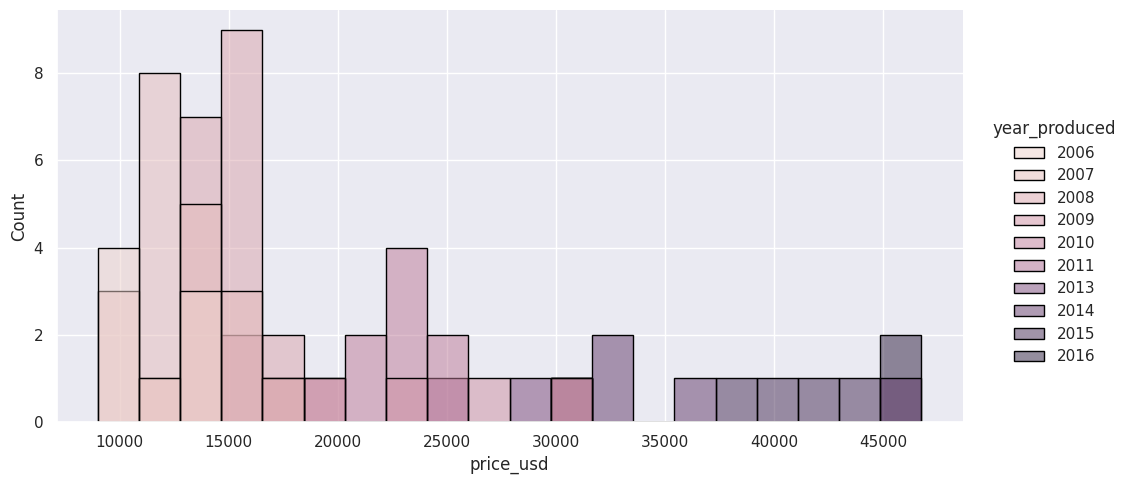

In [121]:
sns.displot(q7, x='price_usd', bins=20, color='c', edgecolor='black', hue="year_produced", height=5, aspect=2)
plt.show()


<AxesSubplot:xlabel='price_usd', ylabel='Count'>

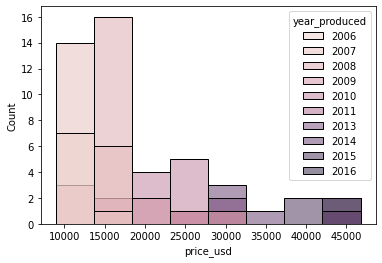

In [9]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced')

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3f569948-e9a8-454f-8f4d-a27aa1610a87' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>

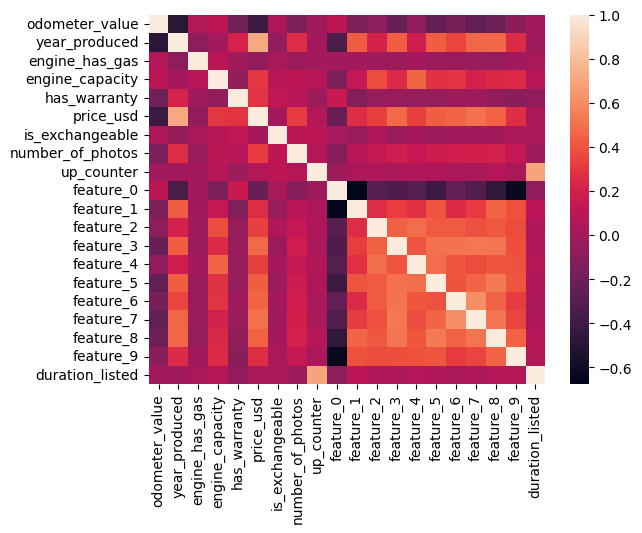

In [47]:
sns.heatmap(df.corr(numeric_only=True))
plt.show()

In [48]:
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


In [57]:

df.groupby('manufacturer_name').size()

manufacturer_name
Acura              66
Alfa Romeo        207
Audi             2468
BMW              2610
Buick              47
Cadillac           43
Chery              58
Chevrolet         436
Chrysler          410
Citroen          1562
Dacia              59
Daewoo            221
Dodge             297
Fiat              824
Ford             2566
Geely              71
Great Wall         36
Honda             797
Hyundai          1116
Infiniti          162
Iveco             139
Jaguar             53
Jeep              107
Kia               912
LADA              146
Lancia             92
Land Rover        184
Lexus             213
Lifan              47
Lincoln            36
Mazda            1328
Mercedes-Benz    2237
Mini               68
Mitsubishi        887
Nissan           1361
Opel             2759
Peugeot          1909
Pontiac            42
Porsche            61
Renault          2493
Rover             235
Saab              108
Seat              303
Skoda            1089
SsangYong     

In [58]:
kia = df[df['manufacturer_name'] == 'Kia']
kia.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
808,Kia,Cerato,mechanical,blue,165000,2009,gasoline,False,gasoline,1.6,...,True,False,False,False,True,False,False,False,True,8
809,Kia,Cee'd,mechanical,black,225275,2007,diesel,False,diesel,1.6,...,True,False,True,False,True,False,False,True,False,1
810,Kia,Sportage,automatic,black,104000,2012,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,25
811,Kia,Sportage,automatic,black,50000,2017,gasoline,False,gasoline,2.0,...,False,False,False,False,False,False,False,False,False,35
812,Kia,Sportage,automatic,black,61000,2015,gasoline,False,gasoline,2.0,...,True,False,True,False,True,False,False,False,True,8


In [72]:
kia.groupby('engine_fuel').size()

engine_fuel
diesel      235
gas          22
gasoline    655
dtype: int64

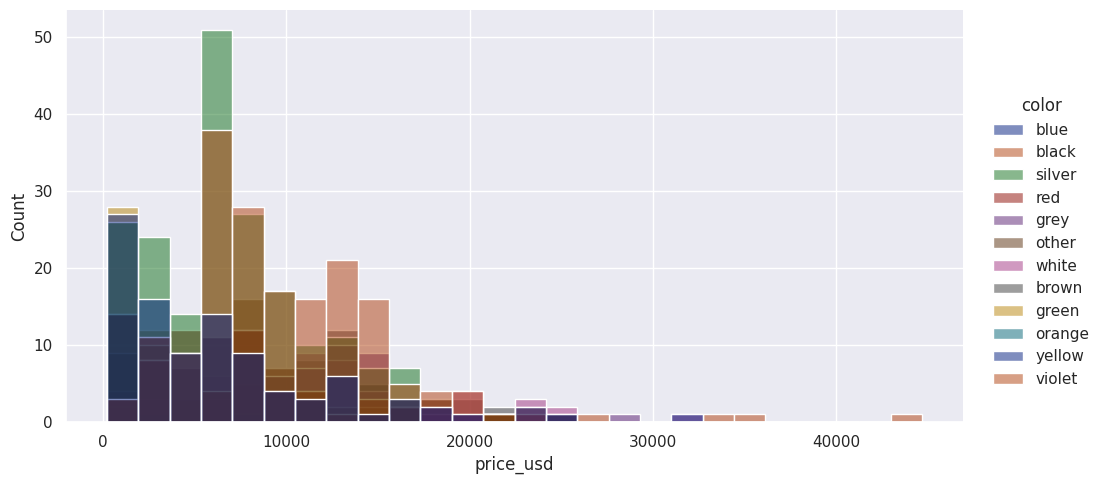

In [119]:
# plt.figure(figsize=(10, 6))
sns.displot(kia, x='price_usd', hue='color', palette='dark', height=5, aspect=2)
plt.show()

In [109]:
kia.pivot_table(index="color", values="price_usd", aggfunc="mean").sort_values(by="price_usd", ascending=False)

,price_usd
color,
orange,13023.122308
brown,12509.340185
white,10386.512821
black,10235.508324
grey,8500.515934
other,7418.613467
silver,6953.698974
red,6487.689545
blue,6475.600808
